In [1]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_raw = pd.read_csv('Data\SEER_Raw_Data_v2.csv')

C:\Users\yuyum\AppData\Local\Temp\ipykernel_33156\700202689.py:1: DtypeWarning: Columns (18,19,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('Data\SEER_Raw_Data_v2.csv')


In [3]:
df = df_raw.copy()

In [4]:
# Define the codes to include
codes_to_include = ['8010', '8012', '8013', '8020', '8046', '8050', 
                    '8051', '8052', '8070', '8071', '8072', '8073',
                      '8074', '8075', '8076', '8077', '8078', '8140',
                        '8141', '8143', '8147', '8250', '8251', '8252',
                          '8253', '8254', '8255', '8260', '8310', '8430',
                            '8480', '8481', '8490', '8560', '8570', '8571',
                              '8572', '8573', '8574', '8575', '8002', '8041', '8042', '8043', '8044', '8045']

# Filter the DataFrame
df_filtered = df[df['ICD-O-3 Hist/behav'].astype(str).str[:4].isin(codes_to_include)].copy()

In [5]:
df_filtered = df_filtered[df_filtered['Year of diagnosis']!=2020]

df_filtered['Year of diagnosis'].value_counts(dropna=False)

Year of diagnosis
2019    41104
2018    40512
Name: count, dtype: int64

In [6]:
# Define the mapping of codes to groups
sclc_codes = ['8002', '8041', '8042', '8043', '8044']
csclc_code = '8045'

# Function to categorize each row
def categorize(row):
    code = row['ICD-O-3 Hist/behav']
    if str(code).startswith(tuple(sclc_codes)):
        return 'SCLC'
    elif str(code).startswith(csclc_code):
        return 'CSCLC'
    else:
        return 'NSCLC'

# Apply the function
df_filtered['Lung Cancer Group'] = df_filtered.apply(categorize, axis=1)

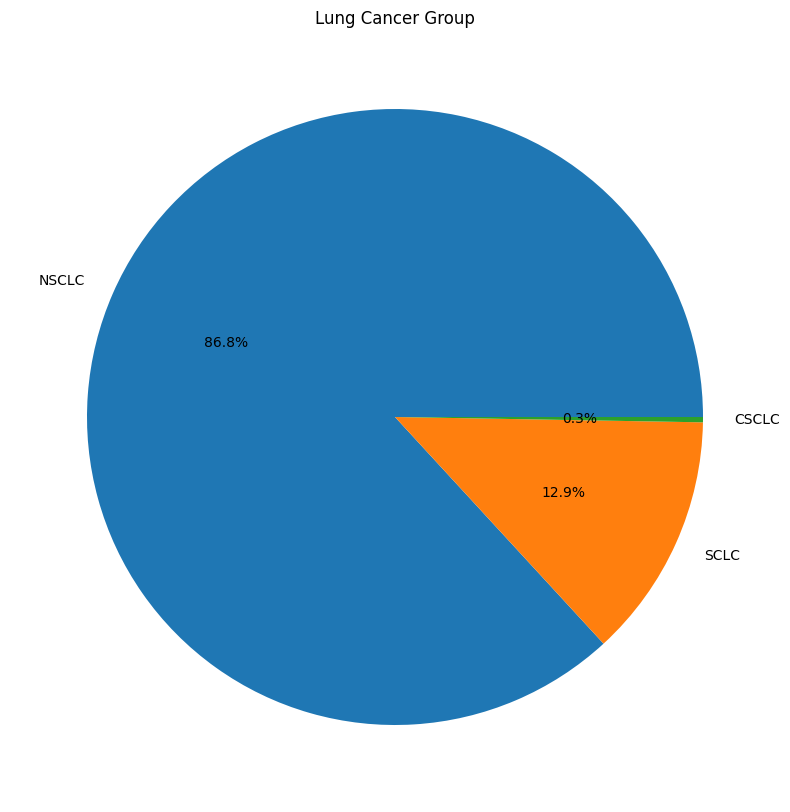

In [7]:
# use piechart and show the percentage of each group
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pie(df_filtered['Lung Cancer Group'].value_counts(), labels=df_filtered['Lung Cancer Group'].value_counts().index, autopct='%1.1f%%')
plt.title('Lung Cancer Group')
plt.show()

In [8]:
df_filtered['Lung Cancer Group'].value_counts(dropna=False)

Lung Cancer Group
NSCLC    70874
SCLC     10517
CSCLC      225
Name: count, dtype: int64

In [9]:
df_filtered.shape

(81616, 113)

In [10]:
113/4

28.25

In [11]:
df_filtered.columns

Index(['Patient ID', 'Age recode with <1 year olds', 'Sex',
       'Year of diagnosis',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
       'Derived EOD 2018 T (2018+)', 'Derived EOD 2018 N (2018+)',
       'Derived EOD 2018 M (2018+)', 'Derived EOD 2018 Stage Group (2018+)',
       'Site recode ICD-O-3/WHO 2008',
       ...
       'Primary by international rules', 'Record number recode',
       'Total number of in situ/malignant tumors for patient',
       'Total number of benign/borderline tumors for patient',
       'Site - mal+ins (most detail)', 'Marital status at diagnosis',
       'CoC Accredited Flag (2018+)',
       'Median household income inflation adj to 2021',
       'Rural-Urban Continuum Code', 'Lung Cancer Group'],
      dtype='object', length=113)

In [12]:
drop_list = [
    "Site recode ICD-O-3/WHO 2008", "Behavior code ICD-O-3", "Site recode ICD-O-3 2023 Revision",
    "Site recode ICD-O-3 2023 Revision Expanded", "Primary Site - labeled",
    "Behavior recode for analysis", "Grade Recode (thru 2017)", "Grade Pathological (2018+)",
    "ICD-O-3 Hist/behav", "ICD-O-3 Hist/behav, malignant", "Histology recode - broad groupings",
    "EOD Schema ID Recode (2010+)", "Site recode - rare tumors",
    "RX Summ--Surg Prim Site (1998+)", "RX Summ--Scope Reg LN Sur (2003+)",
    "RX Summ--Surg Oth Reg/Dis (2003+)", "RX Summ--Surg/Rad Seq",
    "Reason no cancer-directed surgery", "Radiation recode", "Chemotherapy recode (yes, no/unk)",
    "Tumor Deposits Recode (2010+)", "Ulceration Recode (2010+)", "Prostate Pathological Extension (2018+)",
    "Breast Subtype (2010+)", "ER Status Recode Breast Cancer (1990+)",
    "PR Status Recode Breast Cancer (1990+)", "Derived HER2 Recode (2010+)",
    "Lymph-vascular Invasion (2004+ varying by schema)", "Sequence number",
    "Total number of benign/borderline tumors for patient"
]

df_filtered.drop(drop_list, axis=1, inplace=True)

In [13]:
drop_list = df_filtered.iloc[:, 15:59].columns.tolist()
df_filtered.drop(drop_list, axis=1, inplace=True)

In [14]:
df_filtered.head(3)

,Patient ID,Age recode with <1 year olds,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Primary Site,Histologic Type ICD-O-3,Grade Clinical (2018+),Laterality,Diagnostic Confirmation,RX Summ--Systemic/Sur Seq (2007+),Separate Tumor Nodules Ipsilateral Lung Recode (2010+),Visceral and Parietal Pleural Invasion Recode (2010+),EOD Primary Tumor (2018+),EOD Regional Nodes (2018+),EOD Mets (2018+),Tumor Size Summary (2016+),Regional nodes examined (1988+),Regional nodes positive (1988+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Mets at DX-Distant LN (2016+),Mets at DX-Other (2016+),First malignant primary indicator,Primary by international rules,Record number recode,Total number of in situ/malignant tumors for patient,Site - mal+ins (most detail),Marital status at diagnosis,CoC Accredited Flag (2018+),Median household income inflation adj to 2021,Rural-Urban Continuum Code,Lung Cancer Group
0,693,65-69 years,Male,2018,Non-Hispanic White,T3,N1,M0,3A,341,8140,2,Right - origin of primary,Positive histology,Systemic therapy after surgery,None; No intrapulmonary mets; Foci in situ/min...,PL1 or PL2; Invasion of visceral pleura presen...,450,300,0,70,16,9,No,No,No,No,None; no lymph node metastases,None; no other metastases,No,Yes,1,2,Lung and Bronchus - mal+ins,Divorced,ANALYTIC abstract from facility WITH CoC accre...,"$75,000+",Counties in metropolitan areas ge 1 million pop,NSCLC
2,1497,85+ years,Male,2018,Non-Hispanic Asian or Pacific Islander,T1b,N0,M0,1A2,343,8140,9,Left - origin of primary,Positive histology,No systemic therapy and/or surgical procedures,None; No intrapulmonary mets; Foci in situ/min...,PL0; No evidence; Tumor does not completely tr...,300,0,0,20,10,0,No,No,No,No,None; no lymph node metastases,None; no other metastases,No,Yes,1,2,Lung and Bronchus - mal+ins,Married (including common law),ANALYTIC abstract from facility WITH CoC accre...,"$75,000+",Counties in metropolitan areas ge 1 million pop,NSCLC
5,4829,85+ years,Female,2018,Non-Hispanic White,T1b,N0,M0,1A2,343,8070,9,Left - origin of primary,"Positive exfoliative cytology, no positive his...",No systemic therapy and/or surgical procedures,None; No intrapulmonary mets; Foci in situ/min...,Not documented; No resection of primary; Not a...,300,0,0,18,0,98,No,No,No,No,None; no lymph node metastases,None; no other metastases,No,Yes,1,3,Lung and Bronchus - mal+ins,Widowed,NON-ANALYTIC abstract from facility WITH CoC a...,"$75,000+",Counties in metropolitan areas ge 1 million pop,NSCLC


In [15]:
df_filtered.shape

(81616, 39)

In [16]:
df_filtered.dtypes

Patient ID                                                     int64
Age recode with <1 year olds                                  object
Sex                                                           object
Year of diagnosis                                              int64
Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)    object
Derived EOD 2018 T (2018+)                                    object
Derived EOD 2018 N (2018+)                                    object
Derived EOD 2018 M (2018+)                                    object
Derived EOD 2018 Stage Group (2018+)                          object
Primary Site                                                   int64
Histologic Type ICD-O-3                                        int64
Grade Clinical (2018+)                                        object
Laterality                                                    object
Diagnostic Confirmation                                       object
RX Summ--Systemic/Sur Seq (2007+) 

In [19]:
df_filtered['Year of diagnosis'].value_counts(dropna=False)

Year of diagnosis
2019    41104
2018    40512
Name: count, dtype: int64

In [20]:
df_final = df_filtered.copy()

df_final.drop(['Year of diagnosis'], axis=1, inplace=True)

In [ ]:
# map the values of 'Lung Cancer Group' to 0, 1, 2
df_final['Lung Cancer Group'] = df_final['Lung Cancer Group'].map({'SCLC': 1, 'CSCLC': 2, 'NSCLC': 0})

In [21]:
#save the final data
df_final.to_csv('Data\SEER_Final_Data.csv', index=False)

GRADE PATHOLOGICAL: This grade is established after a patient has surgery to remove a tumor. It combines the results of the clinical staging with the surgical findings1. Pathological staging may provide more precise information about the cancer because it allows for direct examination of the tumor and surrounding tissues.

# Laterality # Primary Site - labeled #

In [ ]:
# drop list = Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Site recode ICD-O-3 2023 Revision,Site recode ICD-O-3 2023 Revision Expanded,Primary Site - labeled
# Behavior recode for analysis,Grade Recode (thru 2017), Grade Pathological (2018+), ICD-O-3 Hist/behav	ICD-O-3 Hist/behav, malignant, Histology recode - broad groupings, EOD Schema ID Recode (2010+)
# Site recode - rare tumors, RX Summ--Surg Prim Site (1998+), RX Summ--Scope Reg LN Sur (2003+), RX Summ--Surg Oth Reg/Dis (2003+), RX Summ--Surg/Rad Seq
# Reason no cancer-directed surgery, Radiation recode, Chemotherapy recode (yes, no/unk)

# Tumor Deposits Recode (2010+), Ulceration Recode (2010+), Prostate Pathological Extension (2018+)
# Breast Subtype (2010+), ER Status Recode Breast Cancer (1990+), PR Status Recode Breast Cancer (1990+), Derived HER2 Recode (2010+), Lymph-vascular Invasion (2004+ varying by schema)
# Sequence number,Total number of benign/borderline tumors for patient

 Brain Molecular Markers (2018+)	AFP Post-Orchiectomy Lab Value Recode (2010+)	AFP Pretreatment Interpretation Recode (2010+)	B Symptoms Recode (2010+)	Breslow Thickness Recode (2010+)	CA-125 Pretreatment Interpretation Recode (2010+)	CEA Pretreatment Interpretation Recode (2010+)	Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+)	Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+)	Fibrosis Score Recode (2010+)	Gestational Trophoblastic Prognostic Scoring Index Recode (2010+)	Gleason Patterns Clinical Recode (2010+)	Gleason Patterns Pathological Recode (2010+)	Gleason Score Clinical Recode (2010+)	Gleason Score Pathological Recode (2010+)	hCG Post-Orchiectomy Range Recode (2010+)	Invasion Beyond Capsule Recode (2010+)	Ipsilateral Adrenal Gland Involvement Recode (2010+)	LDH Post-Orchiectomy Range Recode (2010+)	LDH Pretreatment Level Recode (2010+)	LN Head and Neck Levels I-III Recode (2010+)	LN Head and Neck Levels IV-V Recode (2010+)	LN Head and Neck Levels VI-VII Recode (2010+)	LN Head and Neck Other Recode (2010+)	LN Positive Axillary Level I-II Recode (2010+)	Lymph Node Size Recode (2010+)	Major Vein Involvement Recode (2010+)	Measured Basal Diameter Recode (2010+)	Measured Thickness Recode (2010+)	Mitotic Rate Melanoma Recode (2010+)	Number of Cores Positive Recode (2010+)	Number of Cores Examined Recode (2010+)	Number of Examined Para-Aortic Nodes Recode (2010+)	Number of Examined Pelvic Nodes Recode (2010+)	Number of Positive Para-Aortic Nodes Recode (2010+)	Number of Positive Pelvic Nodes Recode (2010+)	Perineural Invasion Recode (2010+)	Peripheral Blood Involvement Recode (2010+)	Peritoneal Cytology Recode (2010+)	Pleural Effusion Recode (2010+)	PSA Lab Value Recode (2010+)	Residual Tumor Volume Post Cytoreduction Recode (2010+)	Response to Neoadjuvant Therapy Recode (2010+)	Sarcomatoid Features Recode (2010+)

In [68]:
df_filtered.columns.get_loc('Brain Molecular Markers (2018+)')

15

In [69]:
df_filtered.columns.get_loc('Sarcomatoid Features Recode (2010+)')

58

In [86]:
df_filtered.iloc[:, 15:59].columns

Index(['Brain Molecular Markers (2018+)',
       'AFP Post-Orchiectomy Lab Value Recode (2010+)',
       'AFP Pretreatment Interpretation Recode (2010+)',
       'B Symptoms Recode (2010+)', 'Breslow Thickness Recode (2010+)',
       'CA-125 Pretreatment Interpretation Recode (2010+)',
       'CEA Pretreatment Interpretation Recode (2010+)',
       'Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+)',
       'Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+)',
       'Fibrosis Score Recode (2010+)',
       'Gestational Trophoblastic Prognostic Scoring Index Recode (2010+)',
       'Gleason Patterns Clinical Recode (2010+)',
       'Gleason Patterns Pathological Recode (2010+)',
       'Gleason Score Clinical Recode (2010+)',
       'Gleason Score Pathological Recode (2010+)',
       'hCG Post-Orchiectomy Range Recode (2010+)',
       'Invasion Beyond Capsule Recode (2010+)',
       'Ipsilateral Adrenal Gland Involvement Recode (2010+)',
       'LDH Post-Orchiectomy Ra

In [81]:
df_test = df_filtered.iloc[:, 15:59].copy()

In [82]:
df_test.shape

(81616, 44)

In [84]:
# drop all na columns
df_test.dropna(axis=1, how='all', inplace=True)

In [85]:
df_test.describe()

,Brain Molecular Markers (2018+),AFP Post-Orchiectomy Lab Value Recode (2010+),AFP Pretreatment Interpretation Recode (2010+),B Symptoms Recode (2010+),Breslow Thickness Recode (2010+),CA-125 Pretreatment Interpretation Recode (2010+),CEA Pretreatment Interpretation Recode (2010+),Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+),Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+),Fibrosis Score Recode (2010+),Gestational Trophoblastic Prognostic Scoring Index Recode (2010+),Gleason Patterns Clinical Recode (2010+),Gleason Patterns Pathological Recode (2010+),Gleason Score Clinical Recode (2010+),Gleason Score Pathological Recode (2010+),hCG Post-Orchiectomy Range Recode (2010+),Invasion Beyond Capsule Recode (2010+),Ipsilateral Adrenal Gland Involvement Recode (2010+),LDH Post-Orchiectomy Range Recode (2010+),LDH Pretreatment Level Recode (2010+),LN Head and Neck Levels I-III Recode (2010+),LN Head and Neck Levels IV-V Recode (2010+),LN Head and Neck Levels VI-VII Recode (2010+),LN Head and Neck Other Recode (2010+),LN Positive Axillary Level I-II Recode (2010+),Lymph Node Size Recode (2010+),Major Vein Involvement Recode (2010+),Measured Basal Diameter Recode (2010+),Measured Thickness Recode (2010+),Mitotic Rate Melanoma Recode (2010+),Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),Number of Examined Para-Aortic Nodes Recode (2010+),Number of Examined Pelvic Nodes Recode (2010+),Number of Positive Para-Aortic Nodes Recode (2010+),Number of Positive Pelvic Nodes Recode (2010+),Perineural Invasion Recode (2010+),Peripheral Blood Involvement Recode (2010+),Peritoneal Cytology Recode (2010+),Pleural Effusion Recode (2010+),PSA Lab Value Recode (2010+),Residual Tumor Volume Post Cytoreduction Recode (2010+),Response to Neoadjuvant Therapy Recode (2010+),Sarcomatoid Features Recode (2010+)
count,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
freq,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616,81616


In [ ]:
# Empty list to hold columns with only one unique value
columns_with_one_unique_value = []



# Loop through each column and check the number of unique values
for column in column_names:
    if df[column].nunique() == 1:
        columns_with_one_unique_value.append(column)

# Print or use the list of columns with only one unique value
print(columns_with_one_unique_value)

In [24]:
df_filtered['Laterality'].value_counts(dropna=False)

Laterality
Right - origin of primary                                45270
Left - origin of primary                                 32166
Paired site, but no information concerning laterality     3229
Bilateral, single primary                                  763
Only one side - side unspecified                           105
Not a paired  site                                          83
Name: count, dtype: int64

In [33]:

df_filtered['Site recode - rare tumors'].value_counts(dropna=False)

Site recode - rare tumors
17.2 Adenocarcinoma with variants of lung                 41314
17.1 Squamous cell carcinoma with variants of lung        19636
17.5 Poorly differentiated endocrine carcinoma of lung    11440
17.8 Other epithelial tumors of lung                       7981
17.3 Adenosquamous carcinoma of lung                        903
17.4 Large cell carcinoma of lung                           270
17.6 Salivary gland type tumor of lung                       58
17.7 Sarcomatoid carcinoma of lung                           14
Name: count, dtype: int64

In [44]:


df_filtered['Separate Tumor Nodules Ipsilateral Lung Recode (2010+)'].value_counts(dropna=False)

Separate Tumor Nodules Ipsilateral Lung Recode (2010+)
None; No intrapulmonary mets; Foci in situ/minimally invasive adenocarcinoma        55859
Not documented; Primary tumor is in situ; Not assessed or unknown if assessed        9847
Separate tumor nodules, ipsilateral lung, unknown if same or different lobe          5589
Separate nodules of same hist type in ipsilateral lung, same lobe                    4317
Separate nodules of same hist type in ipsilateral lung, different lobe               3262
Separate nodules of same hist type in ipsilateral lung, same AND different lobes     2742
Name: count, dtype: int64

In [35]:
df_filtered[df_filtered['ICD-O-3 Hist/behav']=='8140/3: Adenocarcinoma, NOS'].value_counts('Site recode - rare tumors',dropna=False)

Site recode - rare tumors
17.2 Adenocarcinoma with variants of lung    37016
Name: count, dtype: int64

In [31]:
df_filtered[df_filtered['Laterality']=='Bilateral, single primary'].value_counts('Primary Site - labeled',dropna=False)

Primary Site - labeled
C34.9-Lung, NOS                     606
C34.1-Upper lobe, lung               66
C34.3-Lower lobe, lung               43
C34.0-Main bronchus                  31
C34.8-Overlapping lesion of lung     17
Name: count, dtype: int64

In [60]:
df_filtered['Sequence number'].value_counts(dropna=False)

Sequence number
One primary only                                                55841
2nd of 2 or more primaries                                      17205
3rd of 3 or more primaries                                       4003
1st of 2 or more primaries                                       3347
4th of 4 or more primaries                                        933
5th of 5 or more primaries                                        205
6th of 6 or more primaries                                         44
7th of 7 or more primaries                                         17
Unknown seq num - federally required in situ or malig tumors        6
8th of 8 or more primaries                                          3
10th of 10 or more primaries                                        3
9th of 9 or more primaries                                          3
32nd of 32 or more primaries                                        2
21st of 21 or more primaries                                        1
13th

In [64]:
# Sequence number
df_filtered['Rural-Urban Continuum Code'].value_counts(dropna=False)

Rural-Urban Continuum Code
Counties in metropolitan areas ge 1 million pop                 43163
Counties in metropolitan areas of 250,000 to 1 million pop      17921
Nonmetropolitan counties adjacent to a metropolitan area         7517
Counties in metropolitan areas of lt 250 thousand pop            7373
Nonmetropolitan counties not adjacent to a metropolitan area     5505
Unknown/missing/no match (Alaska or Hawaii - Entire State)        135
Unknown/missing/no match/Not 1990-2021                              2
Name: count, dtype: int64

In [18]:
df_filtered.head(3)

,Patient ID,Age recode with <1 year olds,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Site recode ICD-O-3 2023 Revision,Site recode ICD-O-3 2023 Revision Expanded,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior recode for analysis,Grade Recode (thru 2017),Grade Clinical (2018+),Grade Pathological (2018+),Laterality,Diagnostic Confirmation,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,EOD Schema ID Recode (2010+),Site recode - rare tumors,RX Summ--Surg Prim Site (1998+),RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Oth Reg/Dis (2003+),RX Summ--Surg/Rad Seq,Reason no cancer-directed surgery,Radiation recode,"Chemotherapy recode (yes, no/unk)",RX Summ--Systemic/Sur Seq (2007+),Brain Molecular Markers (2018+),AFP Post-Orchiectomy Lab Value Recode (2010+),AFP Pretreatment Interpretation Recode (2010+),B Symptoms Recode (2010+),Breslow Thickness Recode (2010+),CA-125 Pretreatment Interpretation Recode (2010+),CEA Pretreatment Interpretation Recode (2010+),Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+),Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+),Fibrosis Score Recode (2010+),Gestational Trophoblastic Prognostic Scoring Index Recode (2010+),Gleason Patterns Clinical Recode (2010+),Gleason Patterns Pathological Recode (2010+),Gleason Score Clinical Recode (2010+),Gleason Score Pathological Recode (2010+),hCG Post-Orchiectomy Range Recode (2010+),Invasion Beyond Capsule Recode (2010+),Ipsilateral Adrenal Gland Involvement Recode (2010+),LDH Post-Orchiectomy Range Recode (2010+),LDH Pretreatment Level Recode (2010+),LN Head and Neck Levels I-III Recode (2010+),LN Head and Neck Levels IV-V Recode (2010+),LN Head and Neck Levels VI-VII Recode (2010+),LN Head and Neck Other Recode (2010+),LN Positive Axillary Level I-II Recode (2010+),Lymph Node Size Recode (2010+),Major Vein Involvement Recode (2010+),Measured Basal Diameter Recode (2010+),Measured Thickness Recode (2010+),Mitotic Rate Melanoma Recode (2010+),Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),Number of Examined Para-Aortic Nodes Recode (2010+),Number of Examined Pelvic Nodes Recode (2010+),Number of Positive Para-Aortic Nodes Recode (2010+),Number of Positive Pelvic Nodes Recode (2010+),Perineural Invasion Recode (2010+),Peripheral Blood Involvement Recode (2010+),Peritoneal Cytology Recode (2010+),Pleural Effusion Recode (2010+),PSA Lab Value Recode (2010+),Residual Tumor Volume Post Cytoreduction Recode (2010+),Response to Neoadjuvant Therapy Recode (2010+),Sarcomatoid Features Recode (2010+),Separate Tumor Nodules Ipsilateral Lung Recode (2010+),Tumor Deposits Recode (2010+),Ulceration Recode (2010+),Visceral and Parietal Pleural Invasion Recode (2010+),EOD Primary Tumor (2018+),EOD Regional Nodes (2018+),EOD Mets (2018+),Prostate Pathological Extension (2018+),Tumor Size Summary (2016+),Regional nodes examined (1988+),Regional nodes positive (1988+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Mets at DX-Distant LN (2016+),Mets at DX-Other (2016+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),Lymph-vascular Invasion (2004+ varying by schema),Sequence number,First malignant primary indicator,Primary by international rules,Record number recode,Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Site - mal+ins (most detail),Marital status at diagnosis,CoC Accredited Flag (2018+),Median household income inflation adj to 2021,Rural-Urban Continuum Code,Lung Cancer Group
0,693,65-69 years,Male,2018,Non-Hispanic W

In [36]:
df_filtered.iloc[:,:28].head(0)

,Patient ID,Age recode with <1 year olds,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Site recode ICD-O-3 2023 Revision,Site recode ICD-O-3 2023 Revision Expanded,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior recode for analysis,Grade Recode (thru 2017),Grade Clinical (2018+),Grade Pathological (2018+),Laterality,Diagnostic Confirmation,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,EOD Schema ID Recode (2010+),Site recode - rare tumors,RX Summ--Surg Prim Site (1998+)


In [35]:
df_filtered.iloc[:,28:56].head(0)

,RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Oth Reg/Dis (2003+),RX Summ--Surg/Rad Seq,Reason no cancer-directed surgery,Radiation recode,"Chemotherapy recode (yes, no/unk)",RX Summ--Systemic/Sur Seq (2007+),Brain Molecular Markers (2018+),AFP Post-Orchiectomy Lab Value Recode (2010+),AFP Pretreatment Interpretation Recode (2010+),B Symptoms Recode (2010+),Breslow Thickness Recode (2010+),CA-125 Pretreatment Interpretation Recode (2010+),CEA Pretreatment Interpretation Recode (2010+),Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+),Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+),Fibrosis Score Recode (2010+),Gestational Trophoblastic Prognostic Scoring Index Recode (2010+),Gleason Patterns Clinical Recode (2010+),Gleason Patterns Pathological Recode (2010+),Gleason Score Clinical Recode (2010+),Gleason Score Pathological Recode (2010+),hCG Post-Orchiectomy Range Recode (2010+),Invasion Beyond Capsule Recode (2010+),Ipsilateral Adrenal Gland Involvement Recode (2010+),LDH Post-Orchiectomy Range Recode (2010+),LDH Pretreatment Level Recode (2010+),LN Head and Neck Levels I-III Recode (2010+)


In [33]:
df_filtered.iloc[:,58:86].head(0)

,LN Head and Neck Other Recode (2010+),LN Positive Axillary Level I-II Recode (2010+),Lymph Node Size Recode (2010+),Major Vein Involvement Recode (2010+),Measured Basal Diameter Recode (2010+),Measured Thickness Recode (2010+),Mitotic Rate Melanoma Recode (2010+),Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),Number of Examined Para-Aortic Nodes Recode (2010+),Number of Examined Pelvic Nodes Recode (2010+),Number of Positive Para-Aortic Nodes Recode (2010+),Number of Positive Pelvic Nodes Recode (2010+),Perineural Invasion Recode (2010+),Peripheral Blood Involvement Recode (2010+),Peritoneal Cytology Recode (2010+),Pleural Effusion Recode (2010+),PSA Lab Value Recode (2010+),Residual Tumor Volume Post Cytoreduction Recode (2010+),Response to Neoadjuvant Therapy Recode (2010+),Sarcomatoid Features Recode (2010+),Separate Tumor Nodules Ipsilateral Lung Recode (2010+),Tumor Deposits Recode (2010+),Ulceration Recode (2010+),Visceral and Parietal Pleural Invasion Recode (2010+),EOD Primary Tumor (2018+),EOD Regional Nodes (2018+),EOD Mets (2018+)


In [34]:
df_filtered.iloc[:,86:].head(0)

,Prostate Pathological Extension (2018+),Tumor Size Summary (2016+),Regional nodes examined (1988+),Regional nodes positive (1988+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Mets at DX-Distant LN (2016+),Mets at DX-Other (2016+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),Lymph-vascular Invasion (2004+ varying by schema),Sequence number,First malignant primary indicator,Primary by international rules,Record number recode,Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Site - mal+ins (most detail),Marital status at diagnosis,CoC Accredited Flag (2018+),Median household income inflation adj to 2021,Rural-Urban Continuum Code,Lung Cancer Group
